In [713]:
import pandas as pd
import os
import itertools
pd.set_option('display.max_colwidth', 400)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [714]:
path = 'F:/Environmental Baseline Data/Version 2/Data/CSV'  
all_paths = os.listdir(path)
all_paths_folder = [path +  '/' + str(x) for x in all_paths]
len(all_paths_folder)

25077

### Extract csv characteristics (shape, column headers, row index, second row, df.to_string)

In [468]:
exceptions_files = []
shape_list = []
for x in all_paths_folder:
    try:
        df = pd.read_csv(x)
        shape = (list(df.shape))
        shape.insert(0, x)
        shape.insert(0, str((list(df.iloc[0]))))
        shape.insert(0, str(list(df.iloc[:,0])))
        shape.insert(0, str(list(df.columns)))
        onestring = df.values.tolist()
        onestring_flat = str(list(itertools.chain(*onestring)))
        shape.insert(0, onestring_flat)
        shape_list.append(shape)
    except:
        exceptions_files.append(x)

In [715]:
df_csv_all = pd.DataFrame(shape_list)
df_csv_all.columns = ['df_string', 'columns_names', 'index', 'first_row', 'file_name', 'rows', 'columns']
df_csv_all.dtypes

df_string        object
columns_names    object
index            object
first_row        object
file_name        object
rows              int64
columns           int64
dtype: object

In [716]:
df_csv_all.shape

df_csv_all['columns_names'].nunique()
df_csv_all['first_row'].nunique()
df_csv_all['index'].nunique()

(24498, 7)

8077

17446

19003

In [717]:
postal_series = df_csv_all['file_name'].str.extract('([a-zA-Z]\d[a-zA-Z]\d[a-zA-Z]\d)')
df_csv_all.insert(1, 'postal', postal_series)

pages_series = df_csv_all['file_name'].str.extract('page-([^/]+)-tabl')
df_csv_all.insert(2, 'page', pages_series)

tables_series = df_csv_all['file_name'].str.extract('(table-\d)')
df_csv_all.insert(3, 'table', tables_series)
df_csv_all['table'] = df_csv_all['table'].str.replace('table-','')

df_csv_all.head()
df_csv_all.shape
df_csv_all.to_excel('F:/Environmental Baseline Data/Version 3/Indices/csv_characteristics.xlsx', index = False)

,df_string,postal,page,table,columns_names,index,first_row,file_name,rows,columns
0,"['Construction', 'Community Diversity-effects from ROW preparation and drainage alteration', 'Low', nan, nan, 'No', 'Construction', 'Structural Diversity-effects from ROW preparation', 'Low', nan, nan, 'No', 'Construction', 'Species Diversity-effects from ROW preparation, altered drainage, and weed introductions', 'Moderate', 'Long-term', 'Non-reversible', 'No', 'Operations', 'Community Divers...",A0H8C0,100,1,"['Assessment Scenario', 'Issue', 'Magnitude/Extent1', 'Duration2', 'Reversible/ Non-Reversible3', 'Potential for Measurable Contribution to Cumulative Effects4']","['Construction', 'Construction', 'Construction', 'Operations', 'Operations', 'Operations']","['Construction', 'Community Diversity-effects from ROW preparation and drainage alteration', 'Low', nan, nan, 'No']",F:/Environmental Baseline Data/Version 2/Data/CSV/A0H8C0 %2D 13.0 EIA %2D Section 13.1 to 13.6 -page-100-table-1.csv,6,6
1,"['Site Series', 'Area (ha)', '% of Mapped Corridor', 'Area (ha)', '% Change from Hypothetical Baseline1', 'Area (ha)', '% Change from Baseline1', '% Change from Hypothetical Baseline1', 'Area (ha)', '% Change from Baseline1', '% Change from Hypothetical Baseline', 'Area (ha)', '% Change from Baseline', '% Change from Hypothetical Baseline', 'AH- Mountain Alder – Alaska paper birch – beaked...",A0H8C0,101,1,"['Site Series', 'Hypothetical Baseline', 'Unnamed: 2', 'Baseline', 'Unnamed: 4', 'Construction', 'Unnamed: 6', 'Unnamed: 7', 'Operations With Project', 'Unnamed: 9', 'Unnamed: 10', 'Operations, Without Project', 'Unnamed: 12', 'Unnamed: 13']","['Site Series', 'AH- Mountain Alder – Alaska paper birch – beaked sedge – horsetail', 'AM- Stepmoss', 'BS- Cloudberry – sphagnum', 'OW- Open shallow water', 'RI- River', 'SG- Sedge - Grass fen', 'SH- Currant – horsetail', 'TB- Buckbean', 'Anthropogenic', 'Totals']","['Site Series', 'Area (ha)', '% of Mapped Corridor', 'Area (ha)', '% Change from Hypothetical Baseline1', 'Area (ha)', '% Change from Baseline1', '% Change from Hypothetical Baseline1', 'Area (ha)', '% Change from Baseline1', '% Change from Hypothetical Baseline', 'Area (ha)', '% Change from Baseline', '% Change from Hypothetical Baseline']",F:/Environmental Baseline Data/Version 2/Data/CSV/A0H8C0 %2D 13.0 EIA %2D Section 13.1 to 13.6 -page-101-table-1.csv,11,14
2,"['Structural Stage', 'Area (ha)', 'Percent of Mapped Corridor', 'Area (ha)', '% Change from Hypothetical Baseline', 'Area (ha)', '% Change from Hypothetical Baseline', '% Change From Baseline', 'Area (ha)', '% Change from Hypothetical Baseline', '% Change from Baseline', 'Area (ha)', '% Change from Hypothetical Baseline', '% Change from Baseline', '01', '451', '2.6', '501', '11.1', '711', '57....",A0H8C0,105,1,"['Structural Stage', 'Hypothetical Baseline', 'Unnamed: 2', 'Baseline', 'Unnamed: 4', 'Construction', 'Unnamed: 6', 'Unnamed: 7', 'Operations without Project', 'Unnamed: 9', 'Unnamed: 10', 'Operations with Project', 'Unnamed: 12', 'Unnamed: 13']","['Structural Stage', '01', '1', '2', '3', '4', '5', '6', '7', 'Total']","['Structural Stage', 'Area (ha)', 'Percent of Mapped Corridor', 'Area (ha)', '% Change from Hypothetical Baseline', 'Area (ha)', '% Change from Hypothetical Baseline', '% Change From Baseline', 'Area (ha)', '% Change from Hypothetical Baseline', '% Change from Baseline', 'Area (ha)', '% Change from Hypothetical Baseline', '% Change from Baseline']",F:/Environmental Baseline Data/Version 2/Data/CSV/A0H8C0 %2D 13.0 EIA %2D Section 13.1 to 13.6 -page-105-table-1.csv,10,14
3,"['Construction', 'NOx', 'Low', 'Short-term', 'Reversible', 'No', 'Construction', 'CO', 'Low', 'Short-term', 'Reversible', 'No', 'Construction', 'PM', 'Low', 'Short-term', 'Reversible', 'No', 'Construction', 'HC', 'Low', 'Short-term', 'Reversible', 'No', 'Operations', 'HC, NOx, CO, PM', 'Low', 'Medium term', 'Reversible', 'No']",A0H8C0,12,1,"['Assessment Scenario', 'Issue/ Measurable Parameter',

(24498, 10)

### Exceptions

In [774]:
#files with errors, likely cid characters not recognized 
len(exceptions_files)
df_exceptions = pd.DataFrame(exceptions_files)
df_exceptions.columns = ['file_name']

df_exceptions.to_csv('csv_with_cid.csv', index = False)

579

In [737]:
#extract Filing ID and table number
postal_series = df_exceptions['file_name'].str.extract('([a-zA-Z]\d[a-zA-Z]\d[a-zA-Z]\d)')
df_exceptions.insert(1, 'Filing ID', postal_series)

pages_series = df_exceptions['file_name'].str.extract('page-([^/]+)-tabl')
df_exceptions.insert(2, 'page', pages_series)

tables_series = df_exceptions['file_name'].str.extract('(table-\d)')
df_exceptions.insert(3, 'table', tables_series)

In [738]:
# df_exceptions['Filing ID'].unique()
df_exceptions['Filing ID'] = df_exceptions['Filing ID'].str.upper()
print('unique PDFs with at least one exception =', df_exceptions['Filing ID'].nunique())
print('How does this compare with corpus?')

unique PDFs with at least one exception = 73
How does this compare with corpus?


In [739]:
#merge with Index 2
index2path = 'F:\Environmental Baseline Data\Version 3\Indices\Final\Index 2 - List of PDFs for Major Projects with ESAs.csv'
index2 = pd.read_csv(index2path)

# round(int(df_exceptions['Filing ID'].nunique()))
int(list(index2.shape)[0])
round(int(df_exceptions['Filing ID'].nunique()))/int(list(index2.shape)[0])
print('for which proceedings?')

1322

0.05521936459909228

for which proceedings?


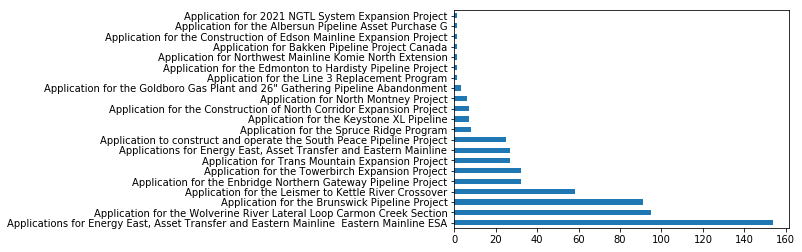

In [740]:
df_exceptions = df_exceptions.merge(index2, on = 'Filing ID')
pd.value_counts(df_exceptions['Application title short']).plot.barh()

In [741]:
print('As percentage of total filings per hearing?')
df_csv_all.shape

As percentage of total filings per hearing?


(24498, 10)

In [771]:
exceptions_grouped = df_exceptions.groupby('Application title short')[['Filing ID']].count().reset_index()

df_csv_all_with_project = df_csv_all.merge(index2, left_on = 'postal', right_on = 'Filing ID')
df_csv_all_with_project_grouped = df_csv_all_with_project.groupby('Application title short')[['file_name']].count().reset_index()

df_csv_all_with_project_exceptions = df_csv_all_with_project_grouped.merge(exceptions_grouped, left_on = 'Application title short', right_on = 'Application title short')
df_csv_all_with_project_exceptions.columns = ['Application title short', 'csv_count', 'csv_exception']

df_csv_all_with_project_exceptions['pct'] = round(df_csv_all_with_project_exceptions['csv_exception']/df_csv_all_with_project_exceptions['csv_count'] * 100, 2)

In [772]:
df_csv_all_with_project_exceptions

,Application title short,csv_count,csv_exception,pct
0,Application for 2021 NGTL System Expansion Project,113,1,0.88
1,Application for Bakken Pipeline Project Canada,386,1,0.26
2,Application for North Montney Project,523,6,1.15
3,Application for Northwest Mainline Komie North Extension,304,1,0.33
4,Application for Trans Mountain Expansion Project,2691,27,1.00
5,Application for the Albersun Pipeline Asset Purchase G,30,1,3.33
6,Application for the Brunswick Pipeline Project,299,91,30.43
7,Application for the Construction of Edson Mainline Expansion Project,258,1,0.39
8,Application for the Construction of North Corridor Expansion Project,959,7,0.73
9,Application for the Edmonton to Hardisty Pipeline Project,481,1,0.21
